# TECH HAVEN ELECTRONIC GOODS STORE ANALYSIS

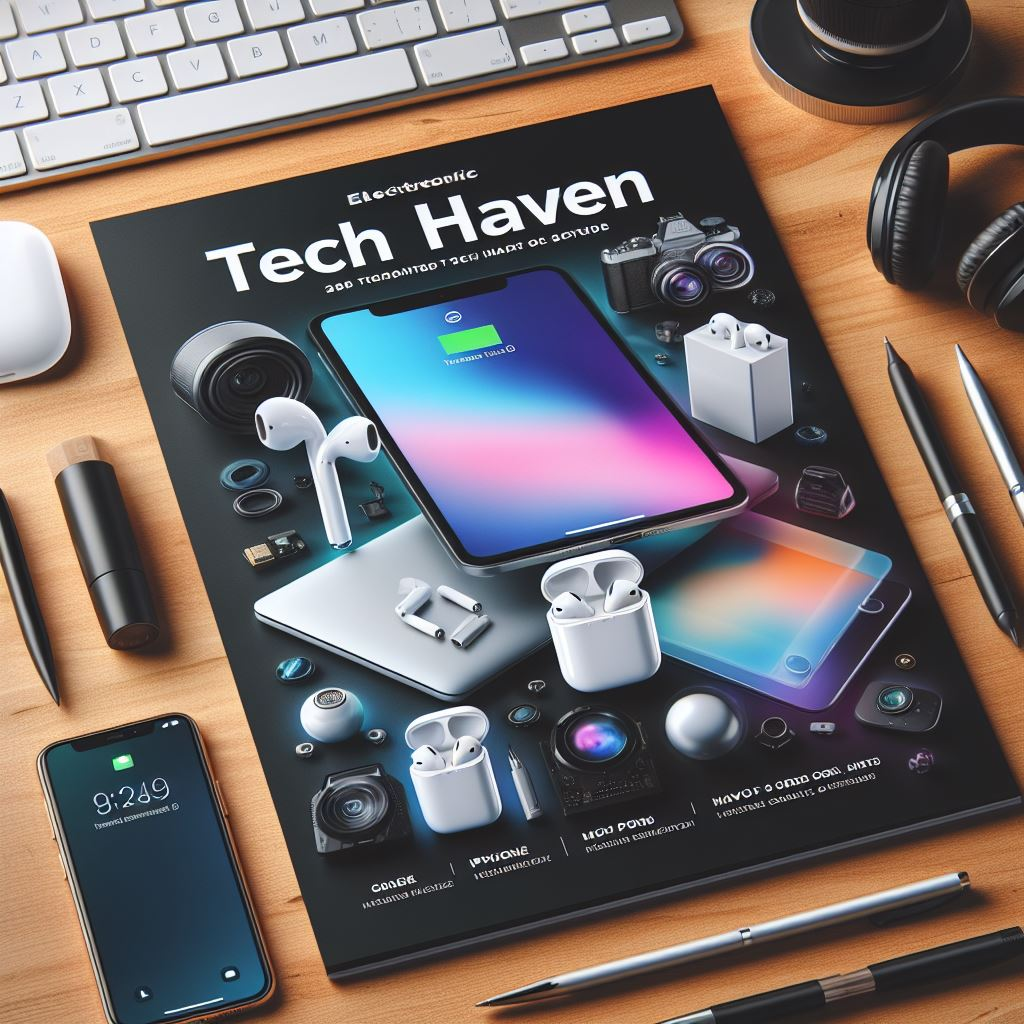

### Project Goal: 
This project aims to analyze the current state of Tech Haven's operations to identify areas for improvement and develop a strategic plan to optimize its position within the electronics retail market and increase revenue.

### Key Areas of Analysis:

- Customer Analysis: Understand Tech Haven's current customer base, their buying habits, and locations.
- Product Mix: Evaluate the effectiveness of Tech Haven's current product offerings and identify potential gaps or opportunities for expansion.
- Pricing Strategy: Analyze Tech Haven's pricing strategy compared to competitors and determine its impact on sales and profitability.
- Sales Performance: Review sales data to identify trends, assess the performance of different product categories

### Expected Outcomes:

- Identify actionable strategies to improve product selection, pricing, and marketing efforts.
- Develop recommendations for optimizing operational efficiency and boosting sales performance.
- Create a strategic roadmap for Tech Haven to thrive in the ever-evolving electronics retail market.

This analysis will provide valuable insights to guide Tech Haven's future growth and ensure its continued success in the competitive electronics retail landscape.

## Group 2 Members:
- Sarah Adams
- Kingsley Deti
- Cedric Parker-Allotey
- Gideon Dodzi Nuvor
- Selina Glover
- Joel Akrowey Kaku

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import cm #import matplotlib color map
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
#importing the linkedin data csv file
data = pd.read_csv("E_goods_sales_data.csv")

In [3]:
#viewing the first few rows of the data
data.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [4]:
#viewing the last few rows of the data
data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [5]:
#checking the number of rows and columns in the data
data.shape

(186850, 6)

In [6]:
#checking the info on the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
#making a copy of the dataset
df = data.copy()

In [8]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


### Operations to be perfomed:
- Check for and remove duplicates
- Check and remove null values
- Rename columns correctly
- Change data types:  
column 2 to int  
column 3 to float
- Change column 3 name to Item_price
- Split order date column into date and time
- Split purchase address into street, city, and zipcode

In [9]:
#checking and removing duplicates
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186850, dtype: bool

In [10]:
df[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"
186785,259297,Lightning Charging Cable,1,14.95,09/15/19 18:54,"138 Main St, Boston, MA 02215"


In [11]:
#Checking for number of duplicate entries
df.duplicated().sum()

1162

In [12]:
#removing duplicates
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(185688, 6)

In [14]:
#renaming columns
new_column_names = ["order_ID", "product", "quantity_ordered", "item_price", "order_date", "purchase_address"]
df.columns = new_column_names 

In [15]:
df.head(10)

,order_ID,product,quantity_ordered,item_price,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [16]:
#checking for and removing null values
df["quantity_ordered"].isnull().sum()


1

In [17]:
#dropping nulls
df.dropna(axis=0, inplace=True)

In [18]:
df["order_date"]

0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: order_date, Length: 185687, dtype: object

In [19]:
df["item_price"].isnull().sum()

0

In [20]:
#converting all non-numeric values in item price column to numeric
df["item_price"] = pd.to_numeric(df["item_price"], errors = 'coerce')

In [21]:
#converting price column to float
df["item_price"] = df["item_price"].astype("float")

In [22]:
#converting all non-numeric values in quantity_ordered column to numeric
df["quantity_ordered"] = pd.to_numeric(df["quantity_ordered"], errors = 'coerce')


In [23]:
#dropping nulls in the quantity_ordered column
df = df.dropna(subset=['quantity_ordered'])

In [24]:
#checking for nulls in the quantity_ordered column
df["quantity_ordered"].isnull().any()

False

In [25]:
#checking the unique values in the quantity column
df["quantity_ordered"].unique()

array([2., 1., 3., 5., 4., 7., 6., 8., 9.])

In [26]:
#converting quantity column to int
df.loc[:,"quantity_ordered"] = df["quantity_ordered"].astype("int")


C:\Users\Admin\AppData\Local\Temp\ipykernel_5484\3228511997.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,"quantity_ordered"] = df["quantity_ordered"].astype("int")


In [27]:
#checking the data types of the various columns
df.dtypes

order_ID             object
product              object
quantity_ordered      int32
item_price          float64
order_date           object
purchase_address     object
dtype: object

In [28]:
#splitting of the datetime column into date and time columns
df[["order_dates","order_time"]] = df["order_date"].str.split(" ", expand=True)

In [29]:
df.head()

,order_ID,product,quantity_ordered,item_price,order_date,purchase_address,order_dates,order_time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04/19/19,08:46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27


In [30]:
#splitting of the purchase address column into street,city, and state columns
df[["street","city","state"]] = df["purchase_address"].str.split(", ", expand=True)

In [31]:
df.head()

,order_ID,product,quantity_ordered,item_price,order_date,purchase_address,order_dates,order_time,street,city,state
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04/19/19,08:46,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27,333 8th St,Los Angeles,CA 90001


In [32]:
#dropping the split columns

df.drop(columns=["order_date","purchase_address"], axis=1, inplace=True)

In [33]:
df.head()

,order_ID,product,quantity_ordered,item_price,order_dates,order_time,street,city,state
0,176558,USB-C Charging Cable,2,11.95,04/19/19,08:46,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19,22:30,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19,14:38,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19,14:38,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19,09:27,333 8th St,Los Angeles,CA 90001


In [34]:
#renaming the state column to zip code
df.rename({"state":"zip_code"}, axis=1, inplace = True)

In [35]:
df.head()

,order_ID,product,quantity_ordered,item_price,order_dates,order_time,street,city,zip_code
0,176558,USB-C Charging Cable,2,11.95,04/19/19,08:46,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19,22:30,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19,14:38,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19,14:38,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19,09:27,333 8th St,Los Angeles,CA 90001


### Exploratory data  analysis 
- Create a revenue column and find the total revenue
- Summary statistics
- Average order value
- Find monthly revenues
- Most purchased product
- Most profitable product
- Relationship between location and product preference

In [36]:
df.head()

,order_ID,product,quantity_ordered,item_price,order_dates,order_time,street,city,zip_code
0,176558,USB-C Charging Cable,2,11.95,04/19/19,08:46,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19,22:30,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19,14:38,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19,14:38,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19,09:27,333 8th St,Los Angeles,CA 90001


In [37]:
#creating a revenue column
df["revenue_in_10k"]= round(((df["quantity_ordered"] * df["item_price"])/10000),2)

In [38]:
df.head()

,order_ID,product,quantity_ordered,item_price,order_dates,order_time,street,city,zip_code,revenue_in_10k
0,176558,USB-C Charging Cable,2,11.95,04/19/19,08:46,917 1st St,Dallas,TX 75001,0.00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19,22:30,682 Chestnut St,Boston,MA 02215,0.01
3,176560,Google Phone,1,600.00,04/12/19,14:38,669 Spruce St,Los Angeles,CA 90001,0.06
4,176560,Wired Headphones,1,11.99,04/12/19,14:38,669 Spruce St,Los Angeles,CA 90001,0.00
5,176561,Wired Headphones,1,11.99,04/30/19,09:27,333 8th St,Los Angeles,CA 90001,0.00


In [39]:
#rearranging columns
columns = list(df.columns)
columns.remove("revenue_in_10k")
item_price_index = columns.index("item_price")
columns.insert(item_price_index+1,"revenue_in_10k")
df = df[columns]

In [40]:
df.head(15)

,order_ID,product,quantity_ordered,item_price,revenue_in_10k,order_dates,order_time,street,city,zip_code
0,176558,USB-C Charging Cable,2,11.95,0.00,04/19/19,08:46,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,0.01,04/07/19,22:30,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,0.06,04/12/19,14:38,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,0.00,04/12/19,14:38,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,0.00,04/30/19,09:27,333 8th St,Los Angeles,CA 90001
6,176562,USB-C Charging Cable,1,11.95,0.00,04/29/19,13:03,381 Wilson St,San Francisco,CA 94016
7,176563,Bose SoundSport Headphones,1,99.99,0.01,04/02/19,07:46,668 Center St,Seattle,WA 98101
8,176564,USB-C Charging Cable,1,11.95,0.00,04/12/19,10:58,790 Ridge St,Atlanta,GA 30301
9,176565,Macbook Pro Laptop,1,1700.00,0.17,04/24/19,10:38,915 Willow St,San Francisco,CA 94016
10,176566,Wired Headphones,1,11.99,0.00,04/08/19,14:05,83 7th St,Boston,MA 02215


In [41]:
#finding the total revenue
total_revenue = df["revenue_in_10k"].sum()
total_revenue

3393.260000000001

In [42]:
#summary statistics of the data
df.describe()

,quantity_ordered,item_price,revenue_in_10k
count,185686.000000,185686.000000,185686.000000
mean,1.124544,184.519255,0.018274
std,0.443069,332.843838,0.033702
min,1.000000,2.990000,0.000000
25%,1.000000,11.950000,0.000000
50%,1.000000,14.950000,0.000000
75%,1.000000,150.000000,0.020000
max,9.000000,1700.000000,0.340000


In [43]:
#average value per order
average_order_value = df["revenue_in_10k"].mean()
average_order_value

0.018274183298687036

In [44]:
#calculating monthly revenue
#first we must create year and month columns
df['year'] = pd.to_datetime(df['order_dates'], format='%m/%d/%y').dt.year
df['month'] = pd.to_datetime(df['order_dates'], format='%m/%d/%y').dt.month

In [45]:
df.head()

,order_ID,product,quantity_ordered,item_price,revenue_in_10k,order_dates,order_time,street,city,zip_code,year,month
0,176558,USB-C Charging Cable,2,11.95,0.00,04/19/19,08:46,917 1st St,Dallas,TX 75001,2019,4
2,176559,Bose SoundSport Headphones,1,99.99,0.01,04/07/19,22:30,682 Chestnut St,Boston,MA 02215,2019,4
3,176560,Google Phone,1,600.00,0.06,04/12/19,14:38,669 Spruce St,Los Angeles,CA 90001,2019,4
4,176560,Wired Headphones,1,11.99,0.00,04/12/19,14:38,669 Spruce St,Los Angeles,CA 90001,2019,4
5,176561,Wired Headphones,1,11.99,0.00,04/30/19,09:27,333 8th St,Los Angeles,CA 90001,2019,4


In [46]:
#calculating monthly revenue
monthly_revenue = df.groupby("month")["revenue_in_10k"].sum().to_frame()

In [47]:
monthly_revenue.index = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [48]:
monthly_revenue

,revenue_in_10k
January,179.22
February,216.75
March,276.49
April,333.57
May,310.04
June,253.86
July,260.50
August,220.85
September,205.87
October,367.57


In [49]:
#finding the most purchased product
most_purchased_product = df["product"].value_counts().to_frame()

In [50]:
most_purchased_product

,product
USB-C Charging Cable,21859
Lightning Charging Cable,21610
AAA Batteries (4-pack),20612
AA Batteries (4-pack),20558
Wired Headphones,18849
Apple Airpods Headphones,15525
Bose SoundSport Headphones,13298
27in FHD Monitor,7498
iPhone,6840
27in 4K Gaming Monitor,6225


In [51]:
#finding the most profitable product
most_profitable_product = df.groupby("product")["revenue_in_10k"].sum().sort_values(ascending = False).to_frame()

In [52]:
most_profitable_product

,revenue_in_10k
product,
Macbook Pro Laptop,803.25
iPhone,479.29
ThinkPad Laptop,412.80
Google Phone,331.74
Apple Airpods Headphones,311.62
27in 4K Gaming Monitor,249.56
34in Ultrawide Monitor,247.68
Flatscreen TV,144.39
Bose SoundSport Headphones,134.30


In [53]:
#finding the relationship between location and product preference
city_avg_value = df.groupby(["city","product"])["revenue_in_10k"].sum().sort_values(ascending = False).to_frame()

In [54]:
city_avg_value.head(15)


,,revenue_in_10k
city,product,
San Francisco,Macbook Pro Laptop,192.95
Los Angeles,Macbook Pro Laptop,127.50
San Francisco,iPhone,116.20
New York City,Macbook Pro Laptop,111.69
San Francisco,ThinkPad Laptop,96.30
Boston,Macbook Pro Laptop,81.43
San Francisco,Google Phone,81.42
Los Angeles,iPhone,78.26
San Francisco,Apple Airpods Headphones,74.30


### Data Visualization with Matplotlib

#### Visuals to be created:
- monthly revenue (line chart)
- top 10 most purchased products(bar chart)
- top 10 products with the highest revenues(column chart)
- top 5 highest purchasing cities(pie chart)
- average monthly order quantities(line chart)





##### Monthly Revenue

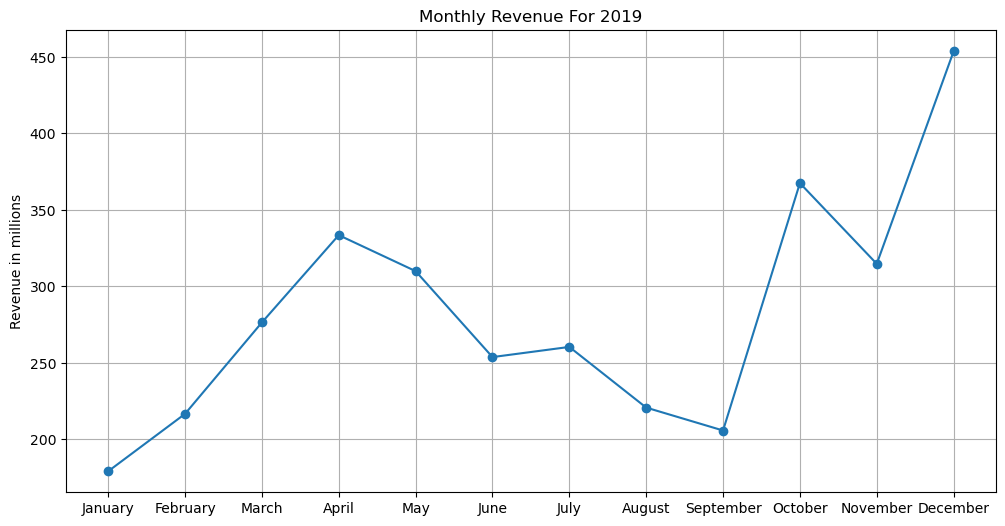

In [55]:
#plotting the monthly revenue chart
plt.figure(figsize = (12,6))
plt.plot(monthly_revenue, marker = "o")
plt.ylabel("Revenue in millions")
plt.title("Monthly Revenue For 2019")
plt.grid(True)

#this saves the chart to a jpeg image
plt.savefig("Monthly Revenue For 2019.jpeg")

plt.show()

##### Top 10 Most Purchased Products

In [56]:
top_10_products = df["product"].value_counts().sort_values(ascending=False).head(10).to_frame()

In [57]:
top_10_products

,product
USB-C Charging Cable,21859
Lightning Charging Cable,21610
AAA Batteries (4-pack),20612
AA Batteries (4-pack),20558
Wired Headphones,18849
Apple Airpods Headphones,15525
Bose SoundSport Headphones,13298
27in FHD Monitor,7498
iPhone,6840
27in 4K Gaming Monitor,6225


In [58]:
purchases = top_10_products["product"].to_frame()

In [59]:
purchases

,product
USB-C Charging Cable,21859
Lightning Charging Cable,21610
AAA Batteries (4-pack),20612
AA Batteries (4-pack),20558
Wired Headphones,18849
Apple Airpods Headphones,15525
Bose SoundSport Headphones,13298
27in FHD Monitor,7498
iPhone,6840
27in 4K Gaming Monitor,6225


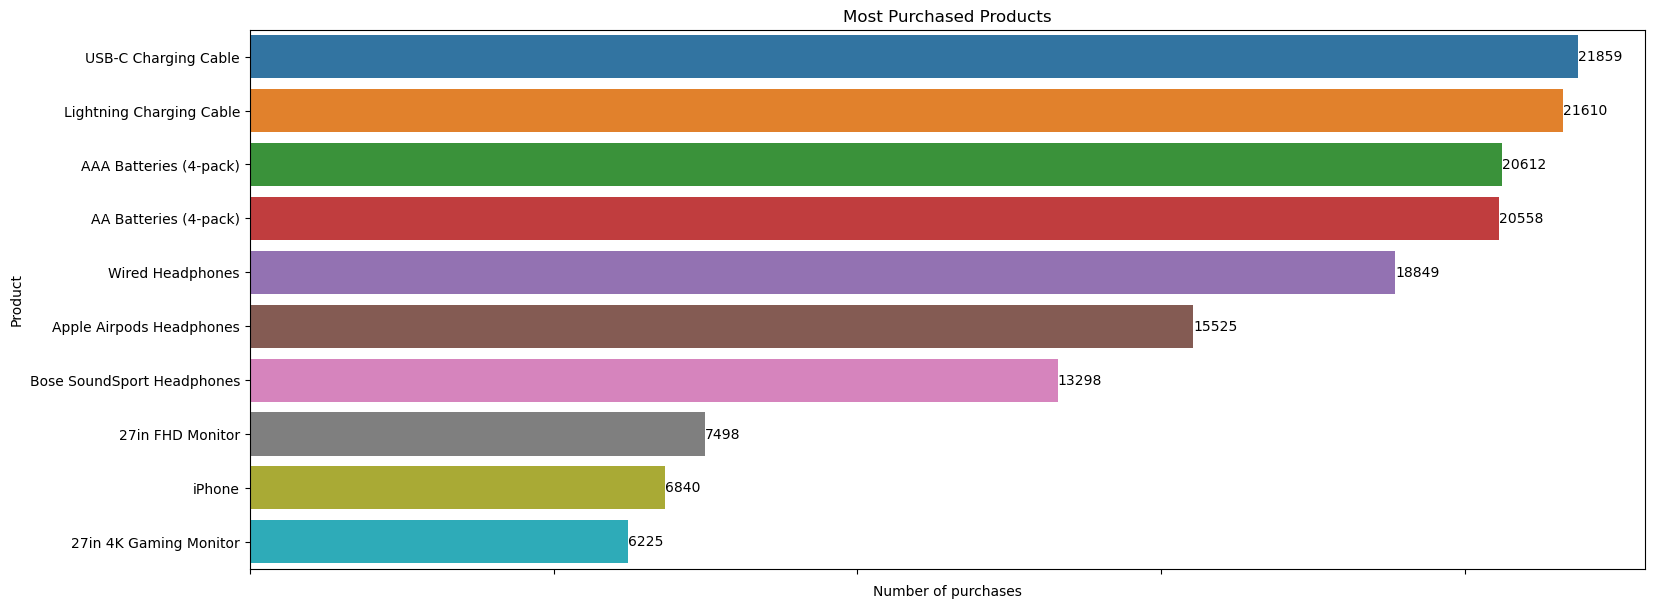

In [60]:
#visualizing top 10 most purchased products
plt.figure(figsize = (18,7))
hbar = sns.barplot(x = top_10_products["product"], y = top_10_products.index , data = top_10_products, orient = "h")
plt.xlabel("Number of purchases")
plt.ylabel("Product")
plt.title("Most Purchased Products")

#adding data labels
for label in hbar.containers:
    hbar.bar_label(label)
    
#remove x-axis values
hbar.set_xticklabels([])

plt.savefig("Most Purchased Products.jpeg")

plt.show()

##### Top 10 Products With The Highest Revenues

In [61]:
#this saves the highest revenue products in a dataframe to be called in the plot function
top_revenue_product = df.groupby("product")["revenue_in_10k"].sum().sort_values(ascending = False).head(10).to_frame()

In [62]:
top_revenue_product

,revenue_in_10k
product,
Macbook Pro Laptop,803.25
iPhone,479.29
ThinkPad Laptop,412.80
Google Phone,331.74
Apple Airpods Headphones,311.62
27in 4K Gaming Monitor,249.56
34in Ultrawide Monitor,247.68
Flatscreen TV,144.39
Bose SoundSport Headphones,134.30


In [63]:
#this saves the revenue amount from the above dataframe as our value axis
revenue_amount = top_revenue_product["revenue_in_10k"]

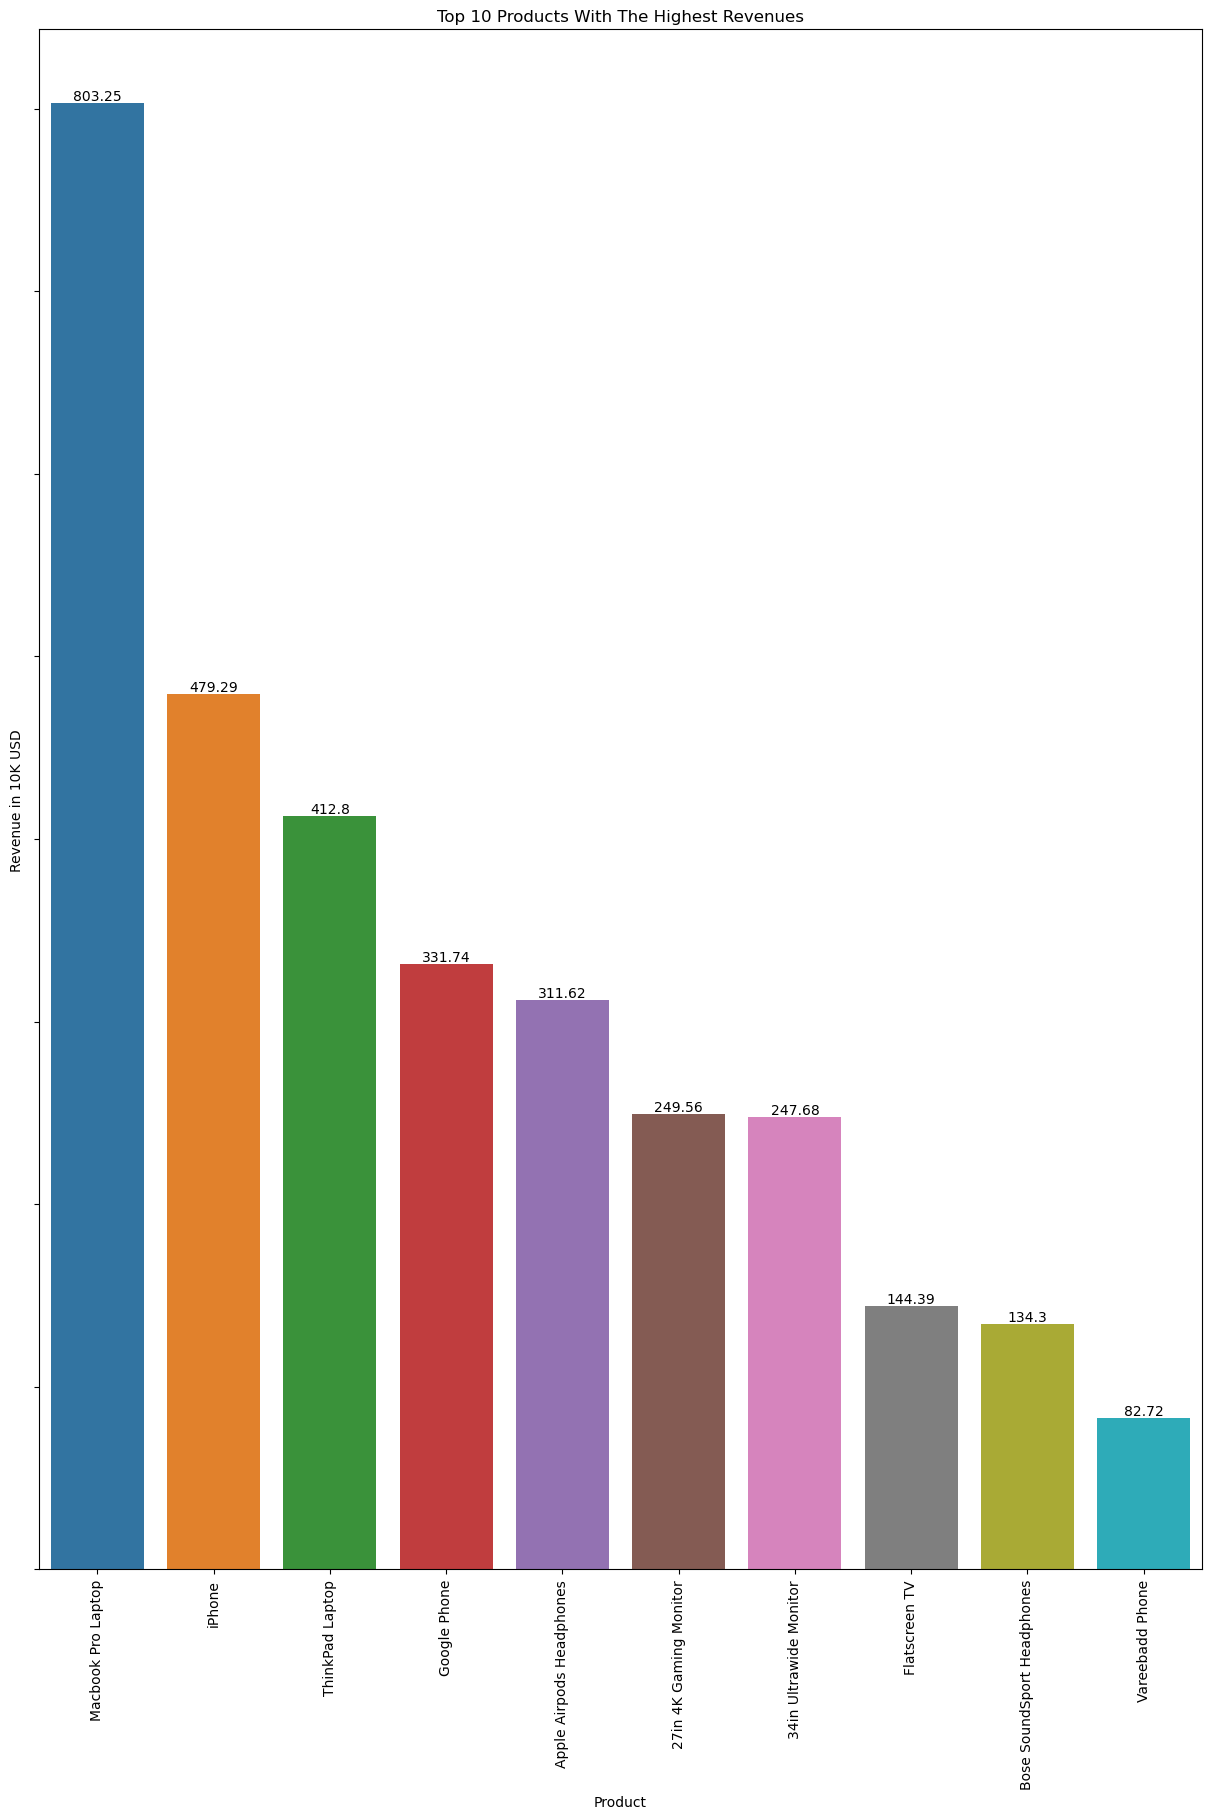

In [64]:
#plotting the Top 10 Products with the most revenue chart
plt.figure(figsize = (15,20))
ax = sns.barplot(x = top_revenue_product.index, y = revenue_amount, data = top_revenue_product)
plt.xlabel("Product")
plt.ylabel("Revenue in 10K USD")
plt.title("Top 10 Products With The Highest Revenues")
plt.xticks(rotation=90)

#add data labels
for container in ax.containers:
    ax.bar_label(container)

#remove y-axis values
ax.set_yticklabels([])
plt.savefig("Top 10 Products With The Highest Revenues.jpeg")
plt.show()

##### Top 5 Highest Purchasing Cities

In [65]:
#saving the top 5 purchasing cities in dataframe
city_value = df.groupby("city")["revenue_in_10k"].sum().sort_values(ascending = False).head(5).to_frame()

In [66]:
city_value

,revenue_in_10k
city,
San Francisco,812.29
Los Angeles,535.94
New York City,458.85
Boston,360.10
Atlanta,275.43


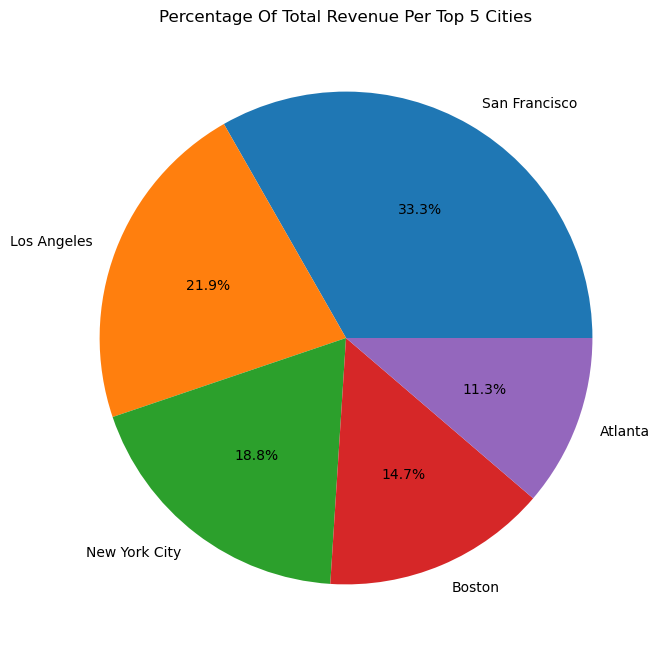

In [67]:
#plotting a pie chart to visualize the above
plt.figure(figsize=(12,8))
plt.pie(city_value["revenue_in_10k"] ,autopct ='%.1f%%', labels = city_value.index)
plt.title("Percentage Of Total Revenue Per Top 5 Cities")
plt.savefig("Percentage Of Total Revenue Per Top 5 Cities.jpeg")
plt.show()

##### Average Monthly Order Quantities

In [68]:
#saving the monthly order quantity in a dataframe to be called in the plot
monthly_order_qty = df.groupby("month")["quantity_ordered"].mean().to_frame()
monthly_order_qty.index = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [69]:
monthly_order_qty

,quantity_ordered
January,1.123105
February,1.123275
March,1.122356
April,1.124829
May,1.126933
June,1.125526
July,1.124623
August,1.124424
September,1.128243
October,1.119512


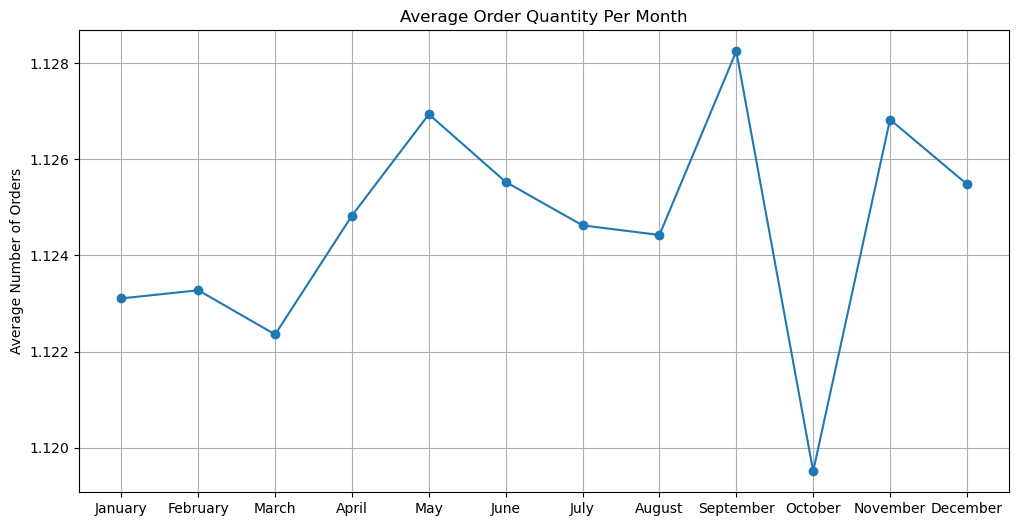

In [70]:
#plotting the average monthly order quantity chart
plt.figure(figsize = (12,6))
plt.plot(monthly_order_qty, marker = "o")
plt.ylabel("Average Number of Orders")
plt.title("Average Order Quantity Per Month")
plt.grid(True)

plt.savefig("Average Order Quantity Per Month.jpeg")

plt.show()

### RECOMMENDATIONS

- Bundle Pricing: Pair the least sold products with most sold products to increase revenue.
- Do more promotional activities in top 5 cities to gain more patronage.
- Do more advertisements and promotional activities in dipping periods to create awareness and maintain customer engagement.
- Invest in and implement targeted advertising by making use of cookies.
- Increase product prices in San Francisco, Los Angeles, and New York areas.

### MACHINE LEARNING

#### Data Modeling:

In [71]:
#creating a copy of the dataset for machine learning
ml_df = df.copy()
ml_df.head(10)

,order_ID,product,quantity_ordered,item_price,revenue_in_10k,order_dates,order_time,street,city,zip_code,year,month
0,176558,USB-C Charging Cable,2,11.95,0.00,04/19/19,08:46,917 1st St,Dallas,TX 75001,2019,4
2,176559,Bose SoundSport Headphones,1,99.99,0.01,04/07/19,22:30,682 Chestnut St,Boston,MA 02215,2019,4
3,176560,Google Phone,1,600.00,0.06,04/12/19,14:38,669 Spruce St,Los Angeles,CA 90001,2019,4
4,176560,Wired Headphones,1,11.99,0.00,04/12/19,14:38,669 Spruce St,Los Angeles,CA 90001,2019,4
5,176561,Wired Headphones,1,11.99,0.00,04/30/19,09:27,333 8th St,Los Angeles,CA 90001,2019,4
6,176562,USB-C Charging Cable,1,11.95,0.00,04/29/19,13:03,381 Wilson St,San Francisco,CA 94016,2019,4
7,176563,Bose SoundSport Headphones,1,99.99,0.01,04/02/19,07:46,668 Center St,Seattle,WA 98101,2019,4
8,176564,USB-C Charging Cable,1,11.95,0.00,04/12/19,10:58,790 Ridge St,Atlanta,GA 30301,2019,4
9,176565,Macbook Pro Laptop,1,1700.00,0.17,04/24/19,10:38,915 Willow St,San Francisco,CA 94016,2019,4
10,176566,Wired Headphones,1,11.99,0.00,04/08/19,14:05,83 7th St,Boston,MA 02215,2019,4


In [72]:
ml_df.shape

(185686, 12)

In [73]:
#converting string columns to categories
ml_df['product']=ml_df['product'].astype('category').cat.codes
ml_df['city']=ml_df['city'].astype('category').cat.codes
ml_df['month']=ml_df['month'].astype('category').cat.codes

In [74]:
#separating the data into predictor variables (X) and target variables (y)
X = ml_df.drop(['order_ID','item_price','order_dates','order_time','street','zip_code','year','city'],axis=1)
y = ml_df['item_price']

In [75]:
X.head(10)

,product,quantity_ordered,revenue_in_10k,month
0,15,2,0.00,3
2,7,1,0.01,3
3,9,1,0.06,3
4,17,1,0.00,3
5,17,1,0.00,3
6,15,1,0.00,3
7,7,1,0.01,3
8,15,1,0.00,3
9,13,1,0.17,3
10,17,1,0.00,3


In [76]:
y.head(10)

0       11.95
2       99.99
3      600.00
4       11.99
5       11.99
6       11.95
7       99.99
8       11.95
9     1700.00
10      11.99
Name: item_price, dtype: float64

In [124]:
#Splitting the data into train dataset and test dataset


X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,test_size = 0.30,random_state = 42)

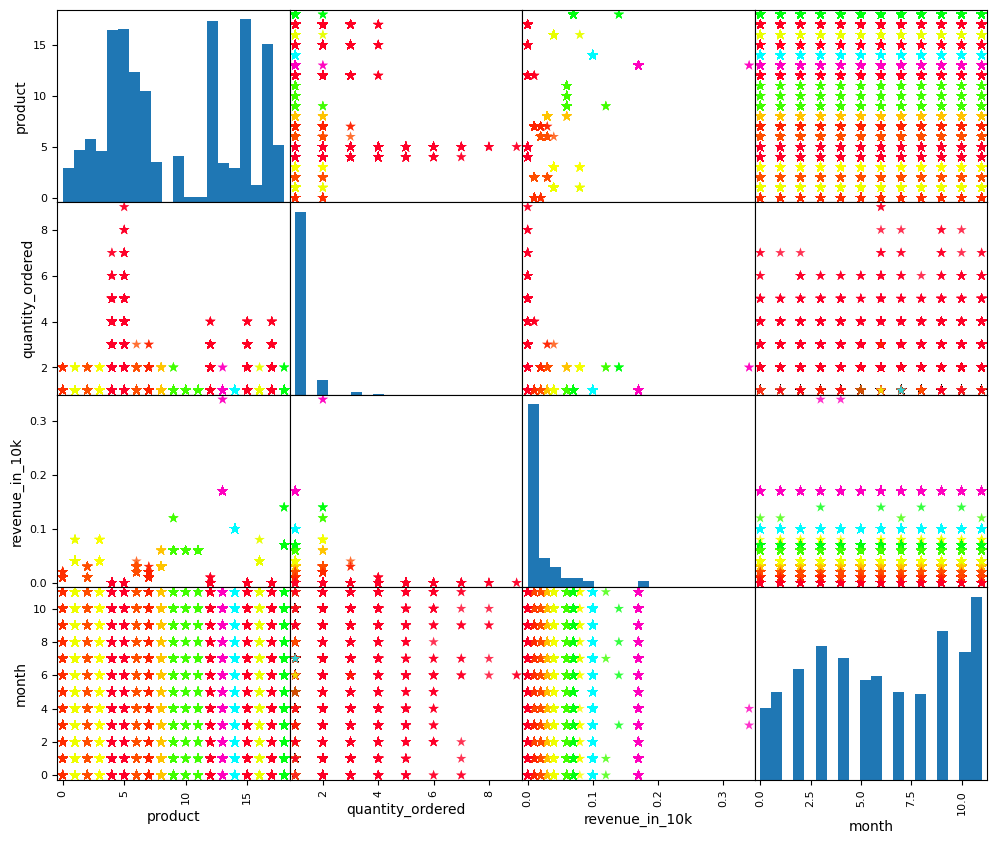

In [117]:
#visualizing the distribution of the data points

pd.plotting.scatter_matrix(X_train,c=y_train, figsize=(12, 10), marker='*',
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap = plt.colormaps.get_cmap('gist_rainbow'))
plt.show()

### Linear Regression:

In [125]:
#Instantiate the linear regression model
lr = LinearRegression()

In [126]:
#Train our linear regression model
lr.fit(X_train,y_train)

LinearRegression()

In [127]:
lr.predict(X_test)

array([  0.95002431,  -0.69840027, 101.11292236, ..., 392.51071453,
       404.6006591 ,   7.47297031])

In [128]:
print("lr.coef_: {}\n".format(lr.coef_))

print("lr.intercept_: {}\n".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [ 9.37204542e-01 -3.74352914e-01  9.83447177e+03  1.87428950e-02]

lr.intercept_: -3.436617071161095

Training set score: 1.00
Test set score: 1.00


In [129]:
y_pred = lr.predict(X_test)
y_pred

array([  0.95002431,  -0.69840027, 101.11292236, ..., 392.51071453,
       404.6006591 ,   7.47297031])

In [130]:
#checking the error that exist between predicted values and actual values

mse = mean_squared_error(y_test,y_pred)
print(f"The mean squared error is: {round((mse),2)}")

The mean squared error is: 526.09


In [99]:
#printing out the actual vs predicted item prices
pred_data = pd.DataFrame()
pred_data['y_pred'] = y_pred
pred_data['y_test'] = y_test.values
pd.set_option('display.max_rows', None)

In [100]:
pred_data.head(100)

,y_pred,y_test
0,101.179820,99.99
1,10.484183,11.95
2,594.257770,600.00
3,992.174677,999.99
4,10.430993,11.95
5,0.293281,3.84
6,0.080522,3.84
7,101.126630,99.99
8,10.404399,11.95
9,101.206415,99.99
